# Линейная регрессия

Линейная регрессия - аппроксимация зависимости данных и целевой переменной с помощью линейной функции:

$$ f_{W,b}(x) = W \vec{x} + b $$

**Важно**: мы предполагаем, что целевая переменная зависит от данных приблизительно линейно; в случае, если это не так, линейная регрессия покажет плохой результат.

Далее будем рассматривать упрощенный вариант линейной регрессии, где целевая переменная зависит лишь от одной характеристики:

$$ f_{w,b}(x) = w x + b $$

$$ \frac{\partial f_{w,b}}{\partial w}(x) = x $$

$$ \frac{\partial f_{w,b}}{\partial b}(x) = 1 $$

Введем функцию потерь (её же будем использовать и как метрику):

$$ Loss(w, b) = MSE(w, b) = \frac{1}{N} \sum_{i=1}^{N}(f_{w,b}(x_i) - y_i)^2 = \frac{1}{N} \sum_{i=1}^{N}(wx_i + b - y_i)^2 $$

Данная функция выпукла, а потому ее минимум - глобальный.

Подбор параметров линейной регрессии основывается на минимизации функции потерь.

Частные производные по параметрам:

$$ \frac{\partial Loss}{\partial w}(w, b) = \frac{2}{N} \sum_{i=1}^N (w x_i + b - y_i) x_i $$

$$ \frac{\partial Loss}{\partial b}(w, b) = \frac{2}{N} \sum_{i=1}^N (w x_i + b - y_i) $$

Найти оптимум функции потерь можно с помощью градиентного спуска:

$$ w_{updated} = w - \lambda \frac{\partial Loss}{\partial w}(w, b) $$

$$ b_{updated} = b - \lambda \frac{\partial Loss}{\partial b}(w, b) $$

In [307]:
import numpy as np

In [308]:
def MSE(xs: np.ndarray, ys_predicted: np.ndarray, ys_true: np.ndarray) -> np.float64:
    return (1 / len(ys_true)) * np.sum((ys_predicted - ys_true) ** 2)

def dMSEdw(xs: np.ndarray, ys_predicted: np.ndarray, ys_true: np.ndarray) -> np.float64:
    return (2 / len(ys_true)) * np.sum((ys_predicted - ys_true) * xs)

def dMSEdb(xs: np.ndarray, ys_predicted: np.ndarray, ys_true: np.ndarray) -> np.float64:
    return (2 / len(ys_true)) * np.sum(ys_predicted - ys_true)

In [309]:
class LinearRegression:

    def __init__(self, w: np.float64 = 0, b: np.float64 = 0):
        self.w = w
        self.b = b

    def predict(self, xs: np.ndarray):
        return self.w * xs + self.b

    def fit(self, xs: np.ndarray, ys: np.ndarray, epochs: int = 1000, lr = lambda epoch: 0.01) -> np.ndarray:
        metrics = np.zeros(epochs)
        for epoch in range(1, epochs + 1):
            ys_predicted = self.predict(xs)

            metrics[epoch - 1] = MSE(xs, ys_predicted, ys)

            current_lr = lr(epoch)
            self.w -= current_lr * dMSEdw(xs, ys_predicted, ys)
            self.b -= current_lr * dMSEdb(xs, ys_predicted, ys)
        return metrics

## Тестирование модели

In [310]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [311]:
df = pd.read_csv("salary_data.csv")
xs = df.iloc[:,:-1].values.flatten()
ys = df.iloc[:,1].values

xs_train, xs_test, ys_train, ys_test = \
    train_test_split(xs, ys, test_size = 1/3, random_state = 0)

model = LinearRegression()

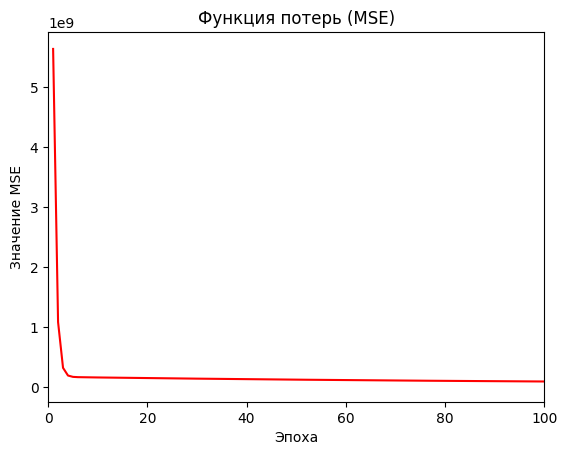

In [312]:
metrics = model.fit(xs_train, ys_train)

plt.plot(range(1, 1000 + 1), metrics, color = "red")
plt.xlim(0, 100)
plt.title("Функция потерь (MSE)")
plt.xlabel("Эпоха")
plt.ylabel("Значение MSE")

plt.show()

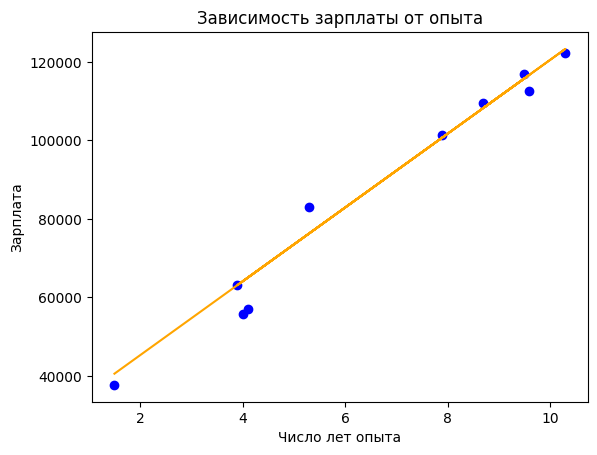

In [313]:
ys_pred = model.predict(xs_test)

plt.scatter(xs_test, ys_test, color = "blue")
plt.plot(xs_test, ys_pred, color = "orange")
plt.title("Зависимость зарплаты от опыта")
plt.xlabel("Число лет опыта")
plt.ylabel("Зарплата")

plt.show()